In [2]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show

data_path = "/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/data/"

In [18]:
s2_rates_path = data_path + 'QGIS/PyShoreVolume/DSAS_rates_20250428_100136.geojson'

# Load the erosion rates (geojson)
s2_rates = gpd.read_file(s2_rates_path)

s2_rates.head()

s2_EPR = s2_rates[['TransectId','EPR']]
len(s2_EPR)

206

In [19]:
aerial_rates_path = data_path + 'QGIS/PyShoreVolume/Aeriel_rates_20250428_120611.geojson'

# Load the erosion rates (geojson)
aerial_rates = gpd.read_file(aerial_rates_path)
aerial_EPR = aerial_rates[['TransectId','EPR']]
len(aerial_EPR)

210

In [22]:
union = aerial_EPR.merge(s2_EPR, on='TransectId', how='inner', suffixes=('_aerial', '_s2'))
len(union)

200

In [30]:
# calculate correlation
import numpy as np
from scipy.stats import pearsonr
def calculate_correlation(df, col1, col2):
    # Drop rows with NaN values in the specified columns
    df = df.dropna(subset=[col1, col2])
    
    # Calculate the Pearson correlation coefficient
    correlation, p_value = pearsonr(df[col1], df[col2])
    
    return correlation, p_value

# Calculate correlation between EPR values from both datasets
correlation, p_value = calculate_correlation(union, 'EPR_aerial', 'EPR_s2')
print(f"Correlation between EPR values: {correlation:.2f}")

Correlation between EPR values: 0.81


(-15.0, 10.0)

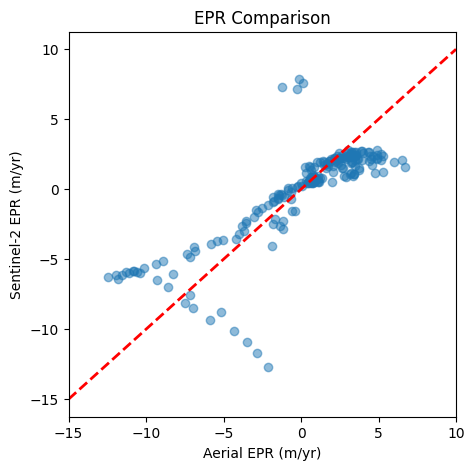

In [28]:
# Scatter plot of the transect EPR values
plt.figure(figsize=(5, 5))
plt.scatter(union['EPR_aerial'], union['EPR_s2'], alpha=0.5)
plt.xlabel('Aerial EPR (m/yr)')
plt.ylabel('Sentinel-2 EPR (m/yr)')
plt.title('EPR Comparison')
plt.plot([-15, 10], [-15, 10], 'r--', lw=2)
plt.xlim(-15, 10)

<Axes: >

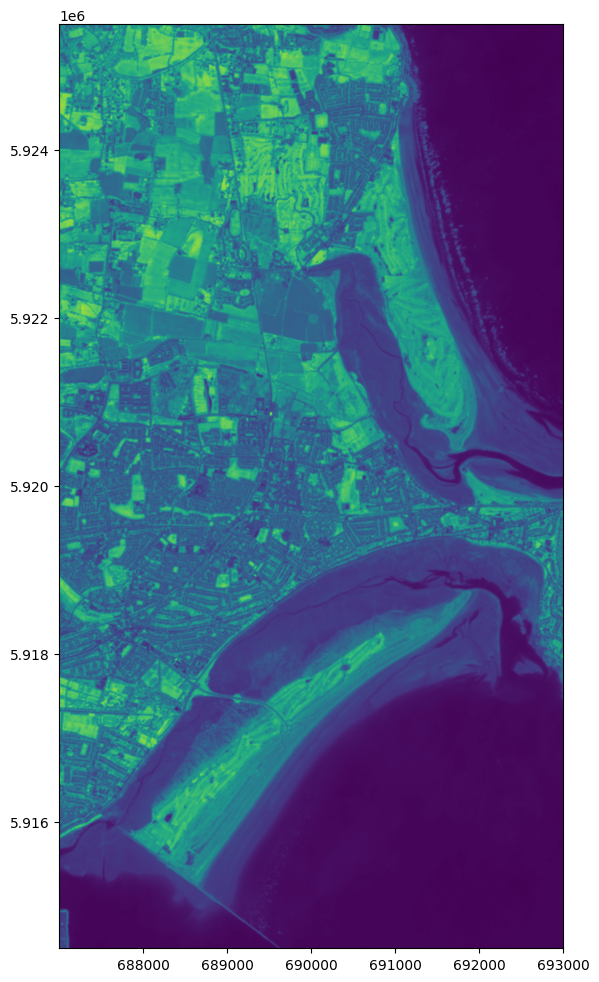

In [8]:
# Paths to your files
tif_path = data_path + 'processed/aoi_crop/S2A_MSIL2A_20160513T113322_N0500_R080_T29UPV_20231028T011442_AOI.tif'

# Load raster
raster = rasterio.open(tif_path)

# Read the bands individually
n = raster.read(4)

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Show RGB
show(n, ax=ax, transform=raster.transform)


In [ ]:






# Plot the erosion rates on top
# You can color by a field in your geojson, for example 'Rate'
gdf.plot(ax=ax, column='Rate', cmap='RdYlBu', linewidth=2, legend=True)

# Titles and labels
ax.set_title('Erosion Rates Overlay', fontsize=16)
ax.set_axis_off()

plt.show()
